# Scanning Session Ingestion

## Setup

### Connect to the database

If you are don't have your login information, contact the administrator.

Using local config file (see [01_pipeline](./01_pipeline.ipynb)):

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

from adamacs.pipeline import subject, session, surgery, scan
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())

[2022-12-15 14:51:28,018][INFO]: Connecting tobiasr@172.26.128.53:3306
[2022-12-15 14:51:28,056][INFO]: Connected tobiasr@172.26.128.53:3306
2022-12-15 14:51:28.181423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-15 14:51:28.181450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading DLC 2.2.1.1...


/home/tobiasr/anaconda3/envs/datajoint/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [ ]:
# subject.Subject.drop()
# subject.Mutation.drop()
# subject.Protocol.drop()
# subject.Line.drop()
# subject.SubjectGenotype.drop()


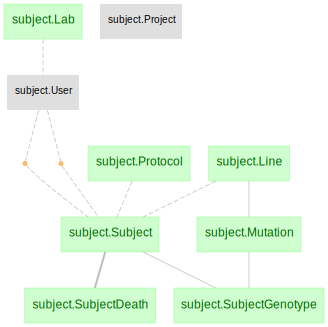

In [40]:
dj.Diagram(subject) + dj.Diagram(protocol)

Manual entry:

In [4]:
# Manual Entry
import datajoint as dj; import getpass
dj.config['database.host'] = '172.26.128.53'        # Put the server name between these apostrophe
dj.config['database.user'] = 'danielmk'             # Put your user name between these apostrophe
dj.config['database.password'] = getpass.getpass()  # Put your password in the prompt
dj.conn()

from adamacs.pipeline import subject, session, surgery, scan
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())


## Ingesting scan

Ingest all scans associated with a given session ID.

In [2]:
# isess.ingest_session_scan('sess9FB2LN5C', verbose=True)
isess.ingest_session_scan('sess9FB2LN5C', verbose=True) #TR: needs to be SessioID ("sess...")


Number of scans found: 1
[['scan9FB2LN5C']]
['DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C']


IntegrityError: Cannot add or update a child row: a foreign key constraint fails (`tobiasr_scan`.`scan`, CONSTRAINT `scan_ibfk_2` FOREIGN KEY (`scanner`) REFERENCES `tobiasr_equipment`.`equipment` (`scanner`) ON UPDATE CASCADE)

In [3]:
session.Session * session.SessionDirectory

session_id,subject PyRat import uses this for earmark value,session_datetime,session_dir Path to the data directory for a session,user_id
sess9FB2LN5C,WEZ-8701,2022-03-18 00:00:00,/datajoint-data/data/tobiasr/DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C,1


In [ ]:
key='scan9FB2LN5C'
(scan.Scan & f'scan_id=\"{key}\"')

In [9]:
scan.Scan()

session_id,scan_id,scanner,acq_software,scan_notes free-notes


##### Some placeholders for equipment and location during development

In [7]:
scan.ScanInfo()

session_id,scan_id,nfields number of fields,nchannels number of channels,ndepths Number of scanning depths (planes),nframes number of recorded frames,nrois number of ROIs (see scanimage's multi ROI imaging),x (um) ScanImage's 0 point in the motor coordinate system,y (um) ScanImage's 0 point in the motor coordinate system,z (um) ScanImage's 0 point in the motor coordinate system,fps (Hz) frames per second - Volumetric Scan Rate,bidirectional true = bidirectional scanning,usecs_per_line microseconds per scan line,fill_fraction raster scan temporal fill fraction (see scanimage),scan_datetime datetime of the scan,scan_duration (seconds) duration of the scan


In [8]:
scan.ScanInfo.Field()

session_id,scan_id,field_idx,px_height height in pixels,px_width width in pixels,um_height height in microns,um_width width in microns,field_x (um) center of field in the motor coordinate system,field_y (um) center of field in the motor coordinate system,field_z (um) relative depth of field,delay_image (ms) delay between the start of the scan and pixels in this field,roi the scanning roi (as recorded in the acquisition software) containing this field - only relevant to mesoscale scans


Note the relative path below:

In [ ]:
#temporary step - insert placeholder values
equipment_placeholder = "Equipment"
location_placeholder = "Location"
from adamacs.pipeline import Equipment, Location
Equipment.insert1({'scanner' : equipment_placeholder}, skip_duplicates=True)
Location.insert1({'anatomical_location': location_placeholder}, skip_duplicates=True) 

In [ ]:
Equipment()
